interactive(children=(IntSlider(value=0, description='n', max=1001), Output()), _dom_classes=('widget-interact…

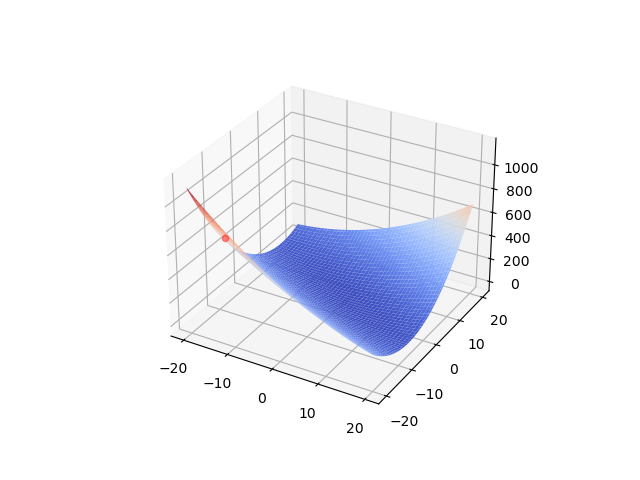

In [4]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt 
import ipywidgets as widgets 
%matplotlib widget

# Generate some random data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.randn(100, 1)

# Initialize the parameters
w = -15
b = -15

# Define the learning rate
learning_rate = 0.1

# Define the number of iterations
num_iterations = 1000

# Initialize the lists to store the values of w and b at each iteration
w_list = [w]
b_list = [b]
cost_list = [np.mean((y - (w*x + b))**2)]

# Define a range of values for w and b
w_values = np.linspace(-20, 20, 100)
b_values = np.linspace(-20, 20, 100)


# Create a mesh grid from w and b values
w_grid, b_grid  = np.meshgrid(w_values,b_values)
def mean_squared_error(w, b, x, y):
    m = len(y)
    J = 0.0
    for i in range(m):
        J += (y[i] - (w*x[i] + b))**2
    return J/m

# Calculate the MSE cost function for each combination of w and b
z = mean_squared_error(w_grid, b_grid, x, y)

# Perform stochastic gradient descent
for i in range(num_iterations):
    # Select a random data point
    rnd_ind = np.random.randint(0, x.shape[0])
    x_i = x[rnd_ind]
    y_i = y[rnd_ind]

    # Compute the gradient
    y_pred = w * x_i + b
    grad_w = (y_pred - y_i) * x_i
    grad_b = y_pred - y_i

    # Update the parameters
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b

    # Store the values of w and b
    w_list.append(w[0])
    b_list.append(b[0])
    cost_list.append(np.mean((y - (w*x + b))**2))


# Plot the cost functiong
fig = plt.figure()
ax = plt.axes(projection='3d', computed_zorder=False)   # computed_zorder is a workaround to make the scatterpoints more visible
ax.plot_surface(w_grid, b_grid, z, cmap='coolwarm')

# Plot the scatter points
@widgets.interact(n=(0, len(w_list), 1))
def update(n = 0):
    ax.scatter3D(w_list[n], b_list[n], cost_list[n], c='r', alpha = 0.4)
# Click on the slider and use the arrow keys to move forward
# To reset the program needs to be used again